In [26]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import tensorflow as tf
from tensorflow.keras import models

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import matthews_corrcoef

from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPooling1D, Flatten,Input


# DATA UNDERSTANDING

In [27]:
df = pd.read_csv('us_foreign_aid.csv')
df.head(10)

C:\Users\HomePC\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning:

Columns (38,39,42) have mixed types.Specify dtype option on import or set low_memory=False.



,country_id,country_code,country_name,region_id,region_name,income_group_id,income_group_name,income_group_acronym,implementing_agency_id,implementing_agency_acronym,...,activity_start_date,activity_end_date,transaction_type_id,transaction_type_name,fiscal_year,current_amount,constant_amount,USG_sector_id,USG_sector_name,submission_id
0,1002,WLD,World,7,World,NaN,NaN,NaN,1,USAID,...,2002-06-04,2015-09-30,2,Obligations,2016,1818282317,1818282317,11,HIV/AIDS,76
1,1002,WLD,World,7,World,NaN,NaN,NaN,1,USAID,...,2002-06-04,2015-09-30,3,Disbursements,2016,1818282317,1818282317,11,HIV/AIDS,76
2,1002,WLD,World,7,World,NaN,NaN,NaN,1,USAID,...,2002-06-04,2015-09-30,3,Disbursements,2012,1670529168,1771102005,11,HIV/AIDS,76
3,1002,WLD,World,7,World,NaN,NaN,NaN,1,USAID,...,2002-06-04,2015-09-30,2,Obligations,2014,1618095498,1656710327,11,HIV/AIDS,76
4,1002,WLD,World,7,World,NaN,NaN,NaN,1,USAID,...,2002-06-04,2015-09-30,3,Disbursements,2014,1618095498,1656710327,11,HIV/AIDS,76
5,1002,WLD,World,7,World,NaN,NaN,NaN,1,USAID,...,2002-06-04,2015-09-30,3,Disbursements,2013,1433084354,1494129606,11,HIV/AIDS,76
6,1002,WLD,World,7,World,NaN,NaN,NaN,1,USAID,...,2002-06-04,2015-09-30,2,Obligations,2012,1415658867,1500887447,11,HIV/AIDS,76
7,368,IRQ,Iraq,3,Middle East and North Africa,3.0,Upper Middle Income Country,UMIC,1,USAID,...,NaN,NaN,2,Obligations,2004,1393359182,1748899495,28,Infrastructure,76
8,1002,WLD,World,7,World,NaN,NaN,NaN,1,USAID,...,2002-06-04,2015-09-30,2,Obligations,2013,1245584354,1298642648,11,HIV/AIDS,76
9,368,IRQ,Iraq,3,Middle East and North Africa,3.0,Upper Middle Income Country,UMIC,1,USAID,...,NaN,NaN,2,Obligations,2003,995233859,1280129487,28,Infrastructure,76


In [28]:
df.tail(5)

,country_id,country_code,country_name,region_id,region_name,income_group_id,income_group_name,income_group_acronym,implementing_agency_id,implementing_agency_acronym,...,activity_start_date,activity_end_date,transaction_type_id,transaction_type_name,fiscal_year,current_amount,constant_amount,USG_sector_id,USG_sector_name,submission_id
950538,376,ISR,Israel,3,Middle East and North Africa,4.0,High Income Country,HIC,1,USAID,...,NaN,NaN,2,Obligations,1988,-1200000000,-2167842627,25,Macroeconomic Foundation for Growth,1
950539,376,ISR,Israel,3,Middle East and North Africa,4.0,High Income Country,HIC,1,USAID,...,NaN,NaN,2,Obligations,1987,-1200000000,-2238066465,25,Macroeconomic Foundation for Growth,1
950540,376,ISR,Israel,3,Middle East and North Africa,4.0,High Income Country,HIC,1,USAID,...,NaN,NaN,2,Obligations,1991,-1850000000,-2995802973,25,Macroeconomic Foundation for Growth,1
950541,376,ISR,Israel,3,Middle East and North Africa,4.0,High Income Country,HIC,1,USAID,...,NaN,NaN,2,Obligations,1986,-1898400000,-3619598627,25,Macroeconomic Foundation for Growth,1
950542,376,ISR,Israel,3,Middle East and North Africa,4.0,High Income Country,HIC,1,USAID,...,NaN,NaN,2,Obligations,1985,-1950050000,-3802905511,25,Macroeconomic Foundation for Growth,1


In [29]:
df.columns

Index(['country_id', 'country_code', 'country_name', 'region_id',
       'region_name', 'income_group_id', 'income_group_name',
       'income_group_acronym', 'implementing_agency_id',
       'implementing_agency_acronym', 'implementing_agency_name',
       'implementing_subagency_id', 'subagency_acronym', 'subagency_name',
       'channel_category_id', 'channel_category_name',
       'channel_subcategory_id', 'channel_subcategory_name', 'channel_id',
       'channel_name', 'dac_category_id', 'dac_category_name',
       'dac_sector_code', 'dac_sector_name', 'dac_purpose_code',
       'dac_purpose_name', 'funding_account_id', 'funding_account_name',
       'funding_agency_id', 'funding_agency_name', 'funding_agency_acronym',
       'assistance_category_id', 'assistance_category_name',
       'aid_type_group_id', 'aid_type_group_name', 'activity_id',
       'activity_name', 'activity_project_number', 'activity_start_date',
       'activity_end_date', 'transaction_type_id', 'transaction_t

In [30]:
df.shape

(950543, 48)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950543 entries, 0 to 950542
Data columns (total 48 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   country_id                   950543 non-null  int64  
 1   country_code                 950257 non-null  object 
 2   country_name                 950543 non-null  object 
 3   region_id                    950543 non-null  int64  
 4   region_name                  950543 non-null  object 
 5   income_group_id              765594 non-null  float64
 6   income_group_name            765594 non-null  object 
 7   income_group_acronym         765594 non-null  object 
 8   implementing_agency_id       950543 non-null  int64  
 9   implementing_agency_acronym  949844 non-null  object 
 10  implementing_agency_name     950543 non-null  object 
 11  implementing_subagency_id    950543 non-null  int64  
 12  subagency_acronym            855631 non-null  object 
 13 

In [32]:
df['activity_end_date'].sort_values(ascending=False)



542662    2027-09-30
193933    2027-09-30
171116    2027-09-30
32585     2027-09-30
2634      2025-11-21
             ...    
950538           NaN
950539           NaN
950540           NaN
950541           NaN
950542           NaN
Name: activity_end_date, Length: 950543, dtype: object

# DATA CLEANING

In [33]:
df.duplicated().sum()

161

In [34]:
df.drop_duplicates(inplace=True)


In [35]:
df.shape

(950382, 48)

In [36]:
df.isnull().sum().sum()

2378793

In [37]:
df.isnull().mean()*100

country_id                      0.000000
country_code                    0.030093
country_name                    0.000000
region_id                       0.000000
region_name                     0.000000
income_group_id                19.456808
income_group_name              19.456808
income_group_acronym           19.456808
implementing_agency_id          0.000000
implementing_agency_acronym     0.073549
implementing_agency_name        0.000000
implementing_subagency_id       0.000000
subagency_acronym               9.986090
subagency_name                  0.000000
channel_category_id             0.000421
channel_category_name           0.000421
channel_subcategory_id          0.000421
channel_subcategory_name        0.000421
channel_id                      0.000000
channel_name                    0.000421
dac_category_id                 0.000000
dac_category_name               0.000000
dac_sector_code                 0.000000
dac_sector_name                 0.000000
dac_purpose_code

In [38]:
df.dropna(inplace = True)

In [39]:
df.shape

(131897, 48)

In [40]:
#df.rename(columns={'region_name': 'region'}, inplace=True)

In [41]:
df.head(5)

,country_id,country_code,country_name,region_id,region_name,income_group_id,income_group_name,income_group_acronym,implementing_agency_id,implementing_agency_acronym,...,activity_start_date,activity_end_date,transaction_type_id,transaction_type_name,fiscal_year,current_amount,constant_amount,USG_sector_id,USG_sector_name,submission_id
46,4,AFG,Afghanistan,4,South and Central Asia,1.0,Low Income Country,LIC,1,USAID,...,2011-09-21,2012-03-31,2,Obligations,2010,422680000,465584869,8,Good Governance,76
51,4,AFG,Afghanistan,4,South and Central Asia,1.0,Low Income Country,LIC,1,USAID,...,2011-09-21,2012-03-31,3,Disbursements,2012,400000000,424081672,8,Good Governance,76
55,400,JOR,Jordan,3,Middle East and North Africa,3.0,Upper Middle Income Country,UMIC,1,USAID,...,2008-10-14,2009-09-30,3,Disbursements,2013,384000000,400357290,25,Macroeconomic Foundation for Growth,76
56,400,JOR,Jordan,3,Middle East and North Africa,3.0,Upper Middle Income Country,UMIC,1,USAID,...,2008-10-14,2009-09-30,2,Obligations,2013,384000000,400357290,25,Macroeconomic Foundation for Growth,76
58,4,AFG,Afghanistan,4,South and Central Asia,1.0,Low Income Country,LIC,1,USAID,...,2012-03-31,2017-03-31,2,Obligations,2015,361000000,365306621,8,Good Governance,76


## EDA VISUALIZATION

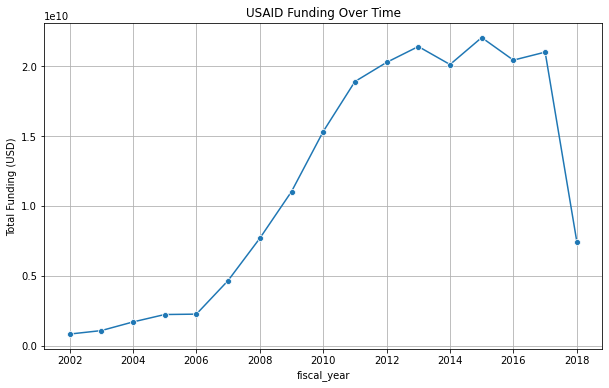

In [57]:
# Convert 'fiscal_year' to datetime if necessary
df['fiscal_year'] = pd.to_datetime(df['fiscal_year'], format='%Y')

# Aggregate funding by fiscal year
funding_over_time = df.groupby('fiscal_year')['current_amount'].sum().reset_index()

# Plot funding over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=funding_over_time, x='fiscal_year', y='current_amount', marker='o')
plt.title('USAID Funding Over Time')
plt.xlabel('fiscal_year')
plt.ylabel('Total Funding (USD)')
plt.grid(True)
plt.show()

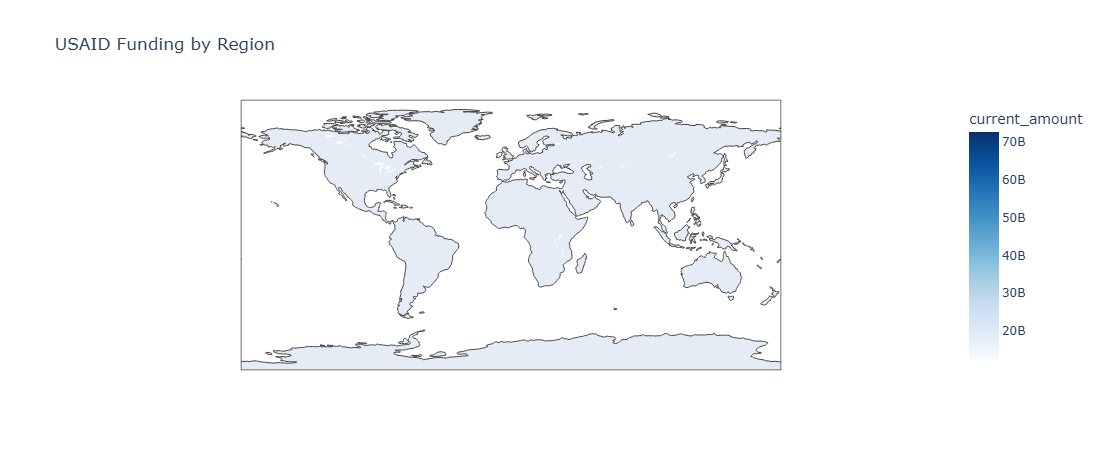

In [43]:
# Aggregate funding by region
funding_by_region = df.groupby('region_name')['current_amount'].sum().reset_index()

# Create a choropleth map
fig = px.choropleth(funding_by_region,
                    locations='region_name',
                    locationmode='country names',
                    color='current_amount',
                    hover_name='region_name',
                    title='USAID Funding by Region',
                    color_continuous_scale='Blues')
fig.show()

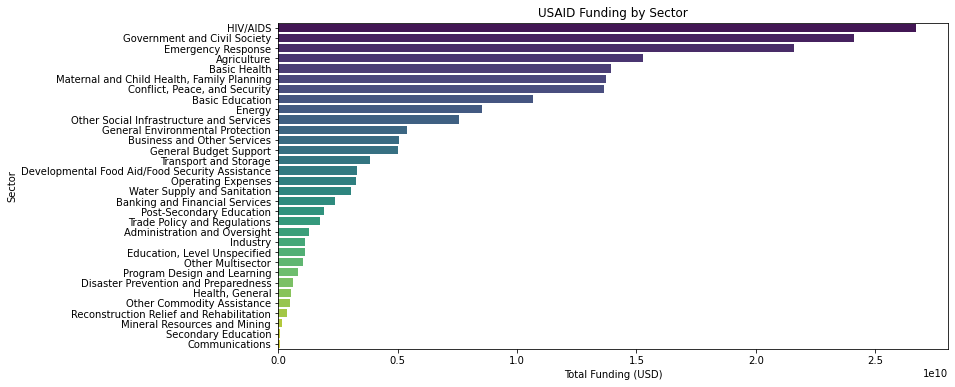

In [44]:
# Aggregate funding by sector
funding_by_sector = df.groupby('dac_sector_name')['current_amount'].sum().reset_index()

# Sort by funding amount
funding_by_sector = funding_by_sector.sort_values(by='current_amount', ascending=False)

# Plot funding by sector
plt.figure(figsize=(12, 6))
sns.barplot(data=funding_by_sector, x='current_amount', y='dac_sector_name', palette='viridis')
plt.title('USAID Funding by Sector')
plt.xlabel('Total Funding (USD)')
plt.ylabel('Sector')
plt.show()

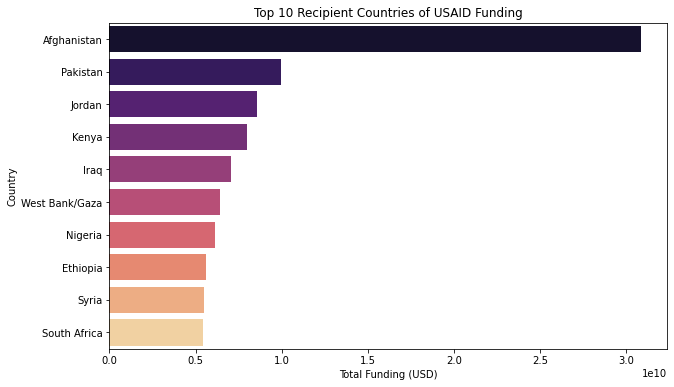

In [45]:
# Aggregate funding by country
funding_by_country = df.groupby('country_name')['current_amount'].sum().reset_index()

# Sort and select top 10 countries
top_countries = funding_by_country.sort_values(by='current_amount', ascending=False).head(10)

# Plot top recipient countries
plt.figure(figsize=(10, 6))
sns.barplot(data=top_countries, x='current_amount', y='country_name', palette='magma')
plt.title('Top 10 Recipient Countries of USAID Funding')
plt.xlabel('Total Funding (USD)')
plt.ylabel('Country')
plt.show()



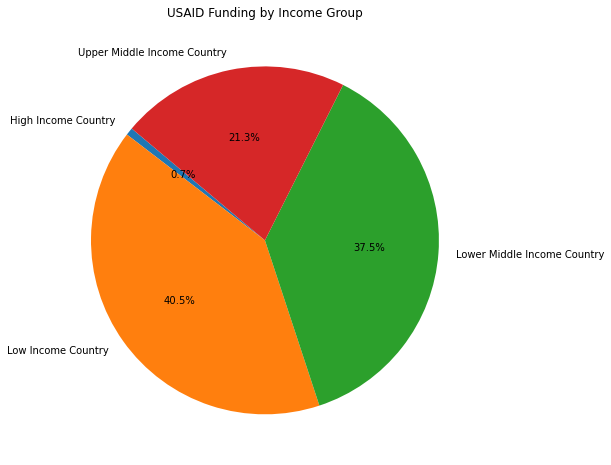

In [46]:
# Aggregate funding by income group
funding_by_income = df.groupby('income_group_name')['current_amount'].sum().reset_index()

# Plot funding by income group
plt.figure(figsize=(8, 8))
plt.pie(funding_by_income['current_amount'], labels=funding_by_income['income_group_name'], autopct='%1.1f%%', startangle=140)
plt.title('USAID Funding by Income Group')
plt.show()

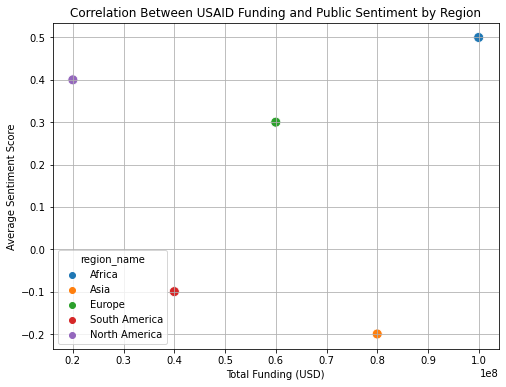

In [47]:
# funding by region data 
funding_by_region = pd.DataFrame({
    'region_name': ['Africa', 'Asia', 'Europe', 'South America', 'North America'],
    'current_amount': [100000000, 80000000, 60000000, 40000000, 20000000]  # Example funding amounts
})

# sentiment data by region 
sentiment_data = {
    'region_name': ['Africa', 'Asia', 'Europe', 'South America', 'North America'],
    'average_sentiment': [0.5, -0.2, 0.3, -0.1, 0.4]  # Example sentiment scores
}
sentiment_df = pd.DataFrame(sentiment_data)

# Merge sentiment data with funding data
merged_df = pd.merge(funding_by_region, sentiment_df, on='region_name')

# Plot correlation
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_df, x='current_amount', y='average_sentiment', hue='region_name', s=100)
plt.title('Correlation Between USAID Funding and Public Sentiment by Region')
plt.xlabel('Total Funding (USD)')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.show()

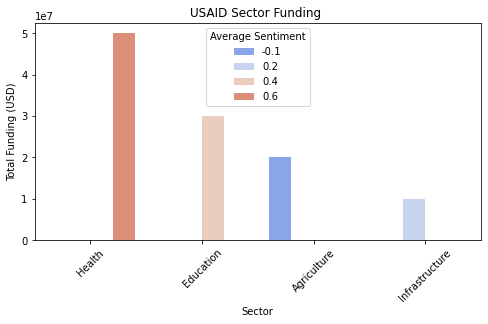

In [58]:
# Example funding by sector data 
funding_by_sector = pd.DataFrame({
    'dac_sector_name': ['Health', 'Education', 'Agriculture', 'Infrastructure'],
    'current_amount': [50000000, 30000000, 20000000, 10000000]  # Example funding amounts
})

# Example sentiment data by sector 
sector_sentiment_data = {
    'dac_sector_name': ['Health', 'Education', 'Agriculture', 'Infrastructure'],
    'average_sentiment': [0.6, 0.4, -0.1, 0.2]  # Example sentiment scores
}
sector_sentiment_df = pd.DataFrame(sector_sentiment_data)

# Merge sentiment data with funding data
sector_merged_df = pd.merge(funding_by_sector, sector_sentiment_df, on='dac_sector_name')

# Plot sector funding vs. sentiment
plt.figure(figsize=(8, 4))
sns.barplot(data=sector_merged_df, x='dac_sector_name', y='current_amount', hue='average_sentiment', palette='coolwarm')
plt.title('USAID Sector Funding ')
plt.xlabel('Sector')
plt.ylabel('Total Funding (USD)')
plt.xticks(rotation=45)
plt.legend(title='Average Sentiment')
plt.show()